### Importing Dependencies

In [30]:
%matplotlib inline


import os
from bs4 import BeautifulSoup as bs
import datetime as dt
import json
import nltk
import numpy as np
import pandas as pd
import pickle
import pprint
import re
import requests
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller 
import statsmodels.api as sm
from pmdarima import auto_arima
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [60]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
# from hvplot import hvPlot
from sklearn.decomposition import PCA
import hvplot.pandas

from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%matplotlib inline

from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample

In [61]:
%matplotlib inline

from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample

### Import Stock Data from Database & Clean Data

In [63]:
#Function to read the file 

def prepare_data(filename):
    df = pd.read_csv(f'{filename}.csv')
    return df

filename = 'stocks_cd10_filtered'

df = prepare_data(filename)



In [64]:
df

,ticker,date,code,open,high,low,close,adjclose,volume,gics_sector
0,AAP,2020-01-02,AAP_2020-01-02,160.470001,160.949997,157.529999,159.410004,153.283569,944900.0,Consumer Discretionary
1,AAP,2020-01-03,AAP_2020-01-03,158.029999,159.630005,157.250000,159.419998,153.293182,567000.0,Consumer Discretionary
2,AAP,2020-01-06,AAP_2020-01-06,157.740005,158.889999,156.429993,156.800003,150.773880,880200.0,Consumer Discretionary
3,AAP,2020-01-07,AAP_2020-01-07,156.899994,157.399994,152.410004,154.940002,148.985367,1129500.0,Consumer Discretionary
4,AAP,2020-01-08,AAP_2020-01-08,154.850006,156.050003,153.139999,153.160004,147.273773,825700.0,Consumer Discretionary
...,...,...,...,...,...,...,...,...,...,...
6385,TSLA,2022-07-11,TSLA_2022-07-11,756.309998,759.190002,700.880005,703.030029,703.030029,33080400.0,Consumer Discretionary
6386,TSLA,2022-07-12,TSLA_2022-07-12,710.539978,719.320007,685.109985,699.210022,699.210022,29310300.0,Consumer Discretionary
6387,TSLA,2022-07-13,TSLA_2022-07-13,676.500000,726.179993,675.099976,711.119995,711.119995,32651500.0,Consumer Discretionary
6388,TSLA,2022-07-14,TSLA_2022-07-14,704.690002,715.960022,688.000000,714.940002,714.940002,26185800.0,Consumer Discretionary


In [66]:
dfs = dict(tuple(df.groupby('ticker')))
dfs

{'AAP':     ticker        date            code        open        high         low  \
 0      AAP  2020-01-02  AAP_2020-01-02  160.470001  160.949997  157.529999   
 1      AAP  2020-01-03  AAP_2020-01-03  158.029999  159.630005  157.250000   
 2      AAP  2020-01-06  AAP_2020-01-06  157.740005  158.889999  156.429993   
 3      AAP  2020-01-07  AAP_2020-01-07  156.899994  157.399994  152.410004   
 4      AAP  2020-01-08  AAP_2020-01-08  154.850006  156.050003  153.139999   
 ..     ...         ...             ...         ...         ...         ...   
 634    AAP  2022-07-11  AAP_2022-07-11  182.899994  183.619995  180.619995   
 635    AAP  2022-07-12  AAP_2022-07-12  181.759995  186.399994  181.759995   
 636    AAP  2022-07-13  AAP_2022-07-13  181.990005  186.449997  180.899994   
 637    AAP  2022-07-14  AAP_2022-07-14  182.410004  186.369995  182.000000   
 638    AAP  2022-07-15  AAP_2022-07-15  188.190002  190.000000  186.270004   
 
           close    adjclose     volume    

In [67]:
# 2. Create data frames for each ticker of particular sector for first segment

def get_adjclosing_value(data):
    dfs = {}
    dfs = dict(tuple(data.groupby('ticker')))
    # 3. Get "adjclose" values and create a data frame of tickers\
    df_adjclose = {}
    for df in dfs:
        dfs[df].set_index('date', inplace = True)
        df_adjclose[df] = dfs[df].adjclose 
    # print(df_t1_close)
    df_adjclose  = pd.DataFrame(df_adjclose)
    return df_adjclose 
get_adjclosing_value(df)

,AAP,AMZN,EBAY,EXPE,F,HD,LOW,NKE,SBUX,TSLA
date,,,,,,,,,,
2020-01-02,153.283569,94.900497,35.086613,110.569191,9.108328,207.633438,115.839394,100.003159,85.087051,86.052002
2020-01-03,153.293182,93.748497,34.757973,108.726028,8.905277,206.943375,115.012360,99.729172,84.591858,88.601997
2020-01-06,150.773880,95.143997,34.583996,108.337479,8.856930,207.916992,115.733612,99.641121,83.925255,90.307999
2020-01-07,148.985367,95.343002,34.429340,109.612740,8.943953,206.555847,115.041245,99.592201,83.668152,93.811996
2020-01-08,147.273773,94.598503,34.410007,108.217926,8.943953,209.646790,116.868347,99.367134,84.639473,98.428001
...,...,...,...,...,...,...,...,...,...,...
2022-07-11,181.750000,111.750000,42.830002,91.160004,11.290000,286.390015,180.110001,105.110001,77.900002,703.030029
2022-07-12,183.839996,109.220001,43.200001,92.029999,11.560000,285.119995,181.000000,103.760002,77.760002,699.210022
2022-07-13,185.339996,110.400002,42.490002,92.980003,11.510000,287.179993,182.369995,105.110001,77.919998,711.119995


In [68]:
Rf = 2.442 # 3 month
nrow = 638
df_adjclose = {}  
df_hl = {}
df_vol = {}
df_co = {}
for df in dfs:
    dfs[df].set_index('date', inplace = True)
    df_adjclose[df] = dfs[df].adjclose
    df_hl[df] = dfs[df].high - dfs[df].low
    df_vol[df] = dfs[df].volume
    df_co[df] = dfs[df].close - dfs[df].open
    df_adjclose = pd.DataFrame(df_adjclose)
    df_hl = pd.DataFrame(df_hl)
    df_vol = pd.DataFrame(df_vol)
    df_co = pd.DataFrame(df_co)    
returns = (df_adjclose.pct_change()*100).mean()
cumulative_return = ((df_adjclose.iloc[638, :] / df_adjclose.iloc[0, :].values) - 1)*100
volatility = (df_adjclose.pct_change()*100).std()
adj_clo = df_adjclose.mean()
    
hl = df_hl.mean()
co = df_co.mean()
vol = df_vol.mean()
    
sharpe_ratio = (cumulative_return - Rf) / volatility
df_return = pd.concat([returns, volatility, cumulative_return, sharpe_ratio, hl, co, adj_clo, vol],  axis = 1)
df_return.columns = ["Returns","Volatility", "Cumulative_Return", "Sharpe Ratio", 'HL', 'Close_Open', 'AdjClose', 'Volume']

In [69]:
df_return

,Returns,Volatility,Cumulative_Return,Sharpe Ratio,HL,Close_Open,AdjClose,Volume
AAP,0.060492,2.343571,23.111699,8.819745,4.859828,-0.039296,173.787369,8.730934e+05
AMZN,0.055853,2.352625,19.651642,7.315081,3.881307,-0.083993,147.900696,8.291895e+07
EBAY,0.060773,2.305752,24.292422,9.476484,1.595540,0.033552,54.395288,8.754112e+06
EXPE,0.036453,3.602874,-16.477639,-5.251263,5.166573,-0.120329,134.220395,3.140870e+06
F,0.091126,3.166409,30.430089,8.839064,0.428498,-0.012660,11.594121,7.854955e+07
HD,0.076515,2.115457,40.829919,18.146400,6.436197,0.154898,286.417917,4.371246e+06
LOW,0.103542,2.415123,59.703875,23.709715,4.323427,0.009484,174.265083,4.344478e+06
NKE,0.033234,2.290594,4.696690,0.984325,2.952801,-0.070313,127.018556,6.962732e+06
SBUX,0.016085,2.302969,-6.425242,-3.850352,2.101628,-0.012879,92.645474,8.336752e+06
TSLA,0.441502,4.651801,736.935801,157.894515,30.140515,-0.228521,603.664847,4.654607e+07


In [70]:
def buy_sell(cumpct):
    if cumpct >= 2:
        return 1
    elif cumpct <= -2:
        return -1
    else:
        return 0

In [72]:
# Lambda function to add class information in to the dataframe

df_return['Class'] = df_return.apply(lambda row: buy_sell(row['Cumulative_Return']), axis=1)

df_return.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, AAP to TSLA
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Returns            10 non-null     float64
 1   Volatility         10 non-null     float64
 2   Cumulative_Return  10 non-null     float64
 3   Sharpe Ratio       10 non-null     float64
 4   HL                 10 non-null     float64
 5   Close_Open         10 non-null     float64
 6   AdjClose           10 non-null     float64
 7   Volume             10 non-null     float64
 8   Class              10 non-null     int64  
dtypes: float64(8), int64(1)
memory usage: 800.0+ bytes


### Preprocessing

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [74]:
y=df_return['Class']
X = df_return.drop(columns='Class')


In [75]:
def split_std_scaler():
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test 

In [76]:
def split_min_max_scaler():
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    X_scaled = MinMaxScaler().fit_transform(X)
    
    return X_scaled

In [97]:
def rf():
    X_train_scaled, X_test_scaled, y_train, y_test = split_std_scaler() 
    clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)  
    features = clf.feature_importances_
    # print(features)
    plt.bar(x = range(len(features)), height=features)
    print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

    return clf, plt.show(), print(features)

Training Score: 1.0
Testing Score: 1.0


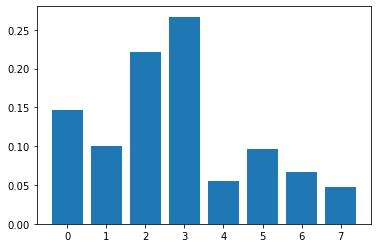

[0.14616911 0.09971001 0.22154151 0.26692918 0.05483211 0.09655372
 0.0673199  0.04694444]


(RandomForestClassifier(n_estimators=500, random_state=1), None, None)

In [98]:
rf()

In [103]:
def erf():
    from sklearn.ensemble import RandomForestClassifier
    X_train_scaled, X_test_scaled, y_train, y_test = split_std_scaler()
    clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
    print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
    return
erf()

Training Score: 1.0
Testing Score: 1.0


### 2. Logistic Regression

In [104]:
def logreg():
    X_train_scaled, X_test_scaled, y_train, y_test = split_std_scaler()
    clf = LogisticRegression().fit(X_train_scaled, y_train)
    print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
    return
logreg()

Training Score: 1.0
Testing Score: 1.0


### 3. Decision Trees



In [105]:
def decision_tree():
    X_train_scaled, X_test_scaled, y_train, y_test = split_std_scaler()
    clf = DecisionTreeClassifier().fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    cm
    return
decision_tree()

In [106]:
def decision_tree_clf():
    clfs = []
    scores = []
    for i in range(50):

        # Sample the data for each new tree
        X_train_scaled, X_test_scaled, y_train, y_test = split_std_scaler()
        X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)

        # Create a decision tree and append it to our list of classifiers
        clf = DecisionTreeClassifier(random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
        clfs.append(clf)

        # Take the median score of all the created classifiers
        y_preds = [clf.predict(X_test_scaled) for clf in clfs]
        y_pred = pd.DataFrame(y_preds).median().round()
        score = score = accuracy_score(y_test, y_pred)
        scores.append(score)

    plt.plot(scores)
    plt.show()
    print(f'score: {score}')
    return

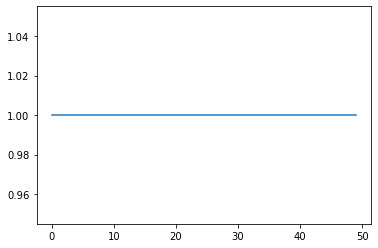

score: 1.0


In [107]:
decision_tree_clf()

In [108]:
def extra_trees():
    from sklearn.ensemble import ExtraTreesClassifier
    X_train_scaled, X_test_scaled, y_train, y_test = split_std_scaler()
    clf = ExtraTreesClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
    print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
    return
extra_trees()

Training Score: 1.0
Testing Score: 1.0


In [111]:
def adb_clf():
    from sklearn.ensemble import AdaBoostClassifier
    X_train_scaled, X_test_scaled, y_train, y_test = split_std_scaler()
    clf = AdaBoostClassifier(random_state=1, n_estimators=50, base_estimator=DecisionTreeClassifier(max_depth=2)).fit(X_train_scaled, y_train)
    print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
    return

adb_clf()

Training Score: 1.0
Testing Score: 1.0


### 4 Multiple Linear Regression

In [114]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [129]:
X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100.0)
X.reshape(-1, 1)
X1=df_return['Cumulative_Return']
model = LinearRegression()

In [130]:
from sklearn.metrics import mean_squared_error, r2_score

model.fit(X, y)

# Use our model to predict a value

predicted = model.predict(X)

# Score the prediction with MSE and R2

mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

mean squared error (MSE): 11.933040779746149
R-squared (R2 ): 0.903603363418708


In [138]:
pip install pandas_datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
Note: you may need to restart the kernel to use updated packages.


In [140]:
import os
import pandas as pd
import numpy as np
import csv
import re
import pandas_datareader.data as pdr

import pickle
import datetime as dt
import matplotlib.pyplot as plt


In [143]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import hvplot.pandas

from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [144]:
os.getcwd()

'/Users/punithakrishnan/Desktop/Project - UNC '

In [145]:
df_return

,Returns,Volatility,Cumulative_Return,Sharpe Ratio,HL,Close_Open,AdjClose,Volume,Class
AAP,0.060492,2.343571,23.111699,8.819745,4.859828,-0.039296,173.787369,8.730934e+05,1
AMZN,0.055853,2.352625,19.651642,7.315081,3.881307,-0.083993,147.900696,8.291895e+07,1
EBAY,0.060773,2.305752,24.292422,9.476484,1.595540,0.033552,54.395288,8.754112e+06,1
EXPE,0.036453,3.602874,-16.477639,-5.251263,5.166573,-0.120329,134.220395,3.140870e+06,-1
F,0.091126,3.166409,30.430089,8.839064,0.428498,-0.012660,11.594121,7.854955e+07,1
HD,0.076515,2.115457,40.829919,18.146400,6.436197,0.154898,286.417917,4.371246e+06,1
LOW,0.103542,2.415123,59.703875,23.709715,4.323427,0.009484,174.265083,4.344478e+06,1
NKE,0.033234,2.290594,4.696690,0.984325,2.952801,-0.070313,127.018556,6.962732e+06,1
SBUX,0.016085,2.302969,-6.425242,-3.850352,2.101628,-0.012879,92.645474,8.336752e+06,-1
TSLA,0.441502,4.651801,736.935801,157.894515,30.140515,-0.228521,603.664847,4.654607e+07,1


In [147]:
stock = df_return.drop(columns=['Class'])
stock_scaled = StandardScaler().fit_transform(stock)
print(stock_scaled[0:5])



[[-0.31575693 -0.53240774 -0.31726109 -0.30051112 -0.16272618 -0.02386301
  -0.04315201 -0.76740835]
 [-0.35527842 -0.52068355 -0.33327174 -0.33330396 -0.28255648 -0.48965018
  -0.20733877  1.89974529]
 [-0.31336844 -0.58138107 -0.31179756 -0.28619806 -0.56247317  0.73528176
  -0.80039876 -0.51121152]
 [-0.52054803  1.09830784 -0.50045196 -0.60717648 -0.12516201 -0.86830469
  -0.29410636 -0.69368727]
 [-0.05478992  0.53311349 -0.28339687 -0.30009008 -0.70538997  0.25370095
  -1.07186605  1.75770452]]


In [148]:
pca = PCA(n_components=3)
stocks_pca = pca.fit_transform(stock_scaled)

# Transform PCA data to a DataFrame
df_stocks_pca = pd.DataFrame(
    data=stocks_pca, columns=["principal component 1", "principal component 2", "principal component 3"]
)
df_stocks_pca.head()

,principal component 1,principal component 2,principal component 3
0,-0.726473,-0.617987,0.390410
1,-0.418385,1.809777,-0.650304
2,-1.362543,-0.394665,-0.158291
3,-0.255923,0.242582,1.688378
4,-0.612324,1.971491,-0.619678


In [149]:
pca.explained_variance_ratio_

array([0.74588093, 0.13928207, 0.07738029])

### KMeans

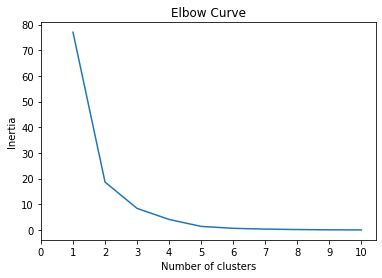

In [151]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_stocks_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [152]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(df_stocks_pca)

# Predict clusters
predictions = model.predict(df_stocks_pca)

# Add the predicted class column to the dataframe
df_stocks_pca["class"] = model.labels_
df_stocks_pca.head()

,principal component 1,principal component 2,principal component 3,class
0,-0.726473,-0.617987,0.390410,2
1,-0.418385,1.809777,-0.650304,3
2,-1.362543,-0.394665,-0.158291,2
3,-0.255923,0.242582,1.688378,2
4,-0.612324,1.971491,-0.619678,3


In [153]:
y=df_stocks_pca['principal component 2']
y.shape

(10,)

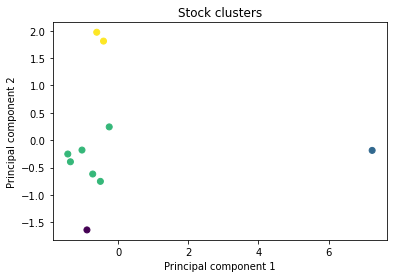

In [154]:
# Visualize the clusters
plt.scatter(x=df_stocks_pca['principal component 1'], y=df_stocks_pca['principal component 2'], c=df_stocks_pca['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Stock clusters')
plt.show()

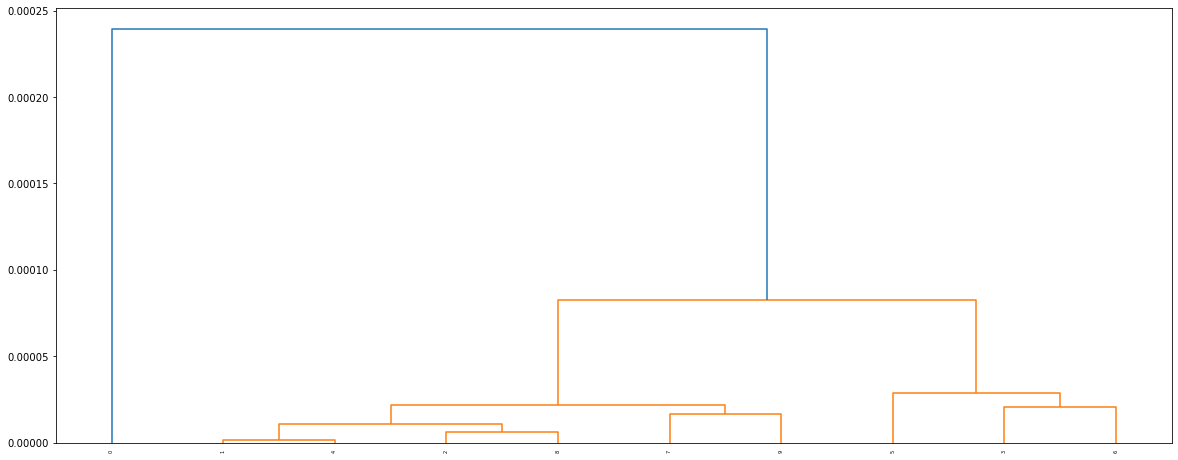

In [158]:
X = df_return
normalized = normalize(X)
mergings = linkage(normalized, method='ward')

plt.figure(figsize=(20,8))

dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)

plt.show()